In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [24]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [25]:
def load_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (512, 512))  # Resize for better performance
    img = img[tf.newaxis, :]
    return img

In [26]:
content_image = load_image('ghibli.jpg')
style_image = load_image('nature.jpg')

In [27]:
stylized_image = hub_model(content_image, style_image)[0]

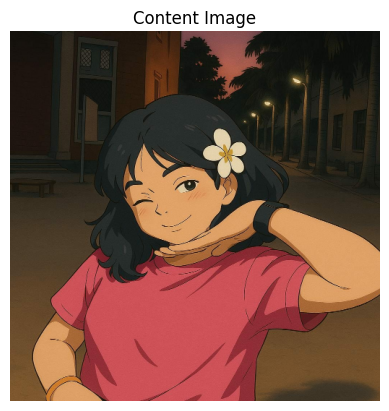

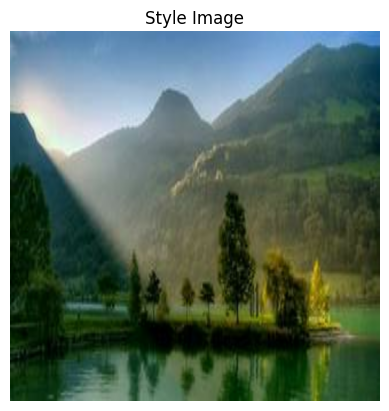

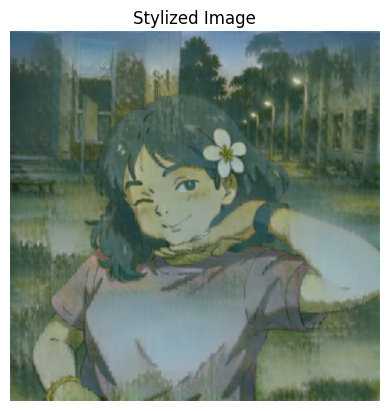

In [28]:
def show_image(image, title=''):
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
    plt.title(title)
    plt.show()

show_image(content_image, 'Content Image')
show_image(style_image, 'Style Image')
show_image(stylized_image, 'Stylized Image')

In [29]:
from PIL import Image
import numpy as np

stylized_image_uint8 = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
stylized_image_uint8 = tf.squeeze(stylized_image_uint8).numpy()

Image.fromarray(stylized_image_uint8).save('stylized_output.png')
print("Stylized image saved as stylized_output.png")

Stylized image saved as stylized_output.png


In [30]:
from google.colab import files
files.download('stylized_output.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>